In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'xvector/predict_scoring_results__20210629T222311.pkl'
#filename = 'xvector-ams/predict_scoring_results__20210630T233955.pkl'

raw = pd.read_pickle(r'../xvectors/{}'.format(filename)).drop(columns=['r2'])
raw.speaker_group = raw.speaker_group.astype(str)

raw.model = raw.model.where(raw.model != "Random Forest Regressor", 'Random Forest')
raw.model = raw.model.where(raw.model != "Linear Regression", 'Linear Regr.')

raw.speaker_group = raw.speaker_group.where(raw.speaker_group != "['LARY']", 'laryng')
raw.speaker_group = raw.speaker_group.where(raw.speaker_group != "['PARE']", 'partres')
raw.speaker_group = raw.speaker_group.where(raw.speaker_group != "['LARY', 'PARE']", 'laryng+partres')
raw.speaker_group = raw.speaker_group.where(raw.speaker_group != "['CTRL']", 'ctrl')

print(raw.speaker_group.unique())
print(raw.shape, raw.dtypes)
# raw.sample(10)

['laryng' 'partres' 'laryng+partres' 'ctrl']
(276, 11) model                object
num_epochs           object
lr                  float64
crit                 object
speaker_group        object
avg_mse             float64
avg_mae             float64
pearson_r           float64
p_value             float64
train_loss_folds     object
test_loss_folds      object
dtype: object


In [2]:
# prepare df
df = raw.copy().loc[raw.groupby(['speaker_group', 'crit', 'model'])['pearson_r'].idxmax()]
df = df.loc[df.model != 'LinearModel']  # remove validation model
df = df.drop(columns=['num_epochs', 'lr'])
df = df.rename(columns={'crit':'criteria', 'pearson_r':'r', 'avg_mae':'mae'})
# df.sort_values('r',ascending=False)

### Plot intell, overall

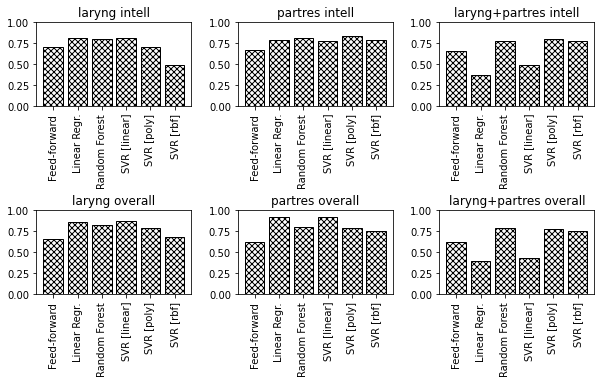

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
plt.subplots_adjust(wspace=.3, hspace=1.25)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.set_ylim([0,1])

_barcolor = "white"
_edgecolor="black"
_hatch="xxxx"

### laryng
_speaker_group = "laryng"


_criteria = "intell"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[0,0].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[0,0].set_title(_speaker_group + " " + _criteria)

_criteria = "overall"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[1,0].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[1,0].set_title(_speaker_group + " " + _criteria)


### partres
_speaker_group = "partres"

_criteria = "intell"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[0,1].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[0,1].set_title(_speaker_group + " " + _criteria)

_criteria = "overall"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[1,1].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[1,1].set_title(_speaker_group + " " + _criteria)


### laryng+partres
_speaker_group = "laryng+partres"

_criteria = "intell"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[0,2].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[0,2].set_title(_speaker_group + " " + _criteria)

_criteria = "overall"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[1,2].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[1,2].set_title(_speaker_group + " " + _criteria)


plt.savefig("regression_results_xvector__laryng_partres_laryngpartres__intell_overall.png", bbox_inches='tight')
plt.savefig("regression_results_xvector__laryng_partres_laryngpartres__intell_overall.eps", format="eps", bbox_inches='tight')

pass

### Plot intell only

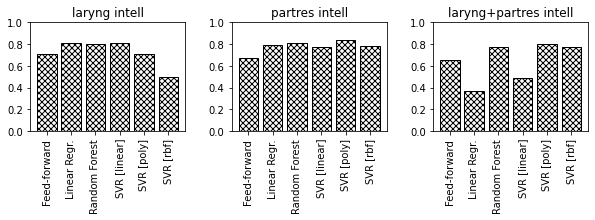

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
plt.subplots_adjust(wspace=.3, hspace=1.25)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.set_ylim([0,1])

_barcolor = "white"
_edgecolor="black"
_hatch="xxxx"

### laryng
_speaker_group = "laryng"


_criteria = "intell"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[0].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[0].set_title(_speaker_group + " " + _criteria)


### partres
_speaker_group = "partres"

_criteria = "intell"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[1].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[1].set_title(_speaker_group + " " + _criteria)


### laryng+partres
_speaker_group = "laryng+partres"

_criteria = "intell"
_df = df.loc[df.speaker_group == _speaker_group].loc[df.criteria == _criteria]
axs[2].bar(_df.model, _df.r, color=_barcolor, edgecolor=_edgecolor, hatch=_hatch)
axs[2].set_title(_speaker_group + " " + _criteria)


plt.savefig("regression_results_xvector__laryng_partres_laryngpartres__intell.png", bbox_inches='tight')
plt.savefig("regression_results_xvector__laryng_partres_laryngpartres__intell.eps", format="eps", bbox_inches='tight')

pass

### Results table for LaTeX

In [6]:
df['crit_order'] = None
df.loc[df.criteria == 'intell',  'crit_order'] = 1
df.loc[df.criteria == 'overall', 'crit_order'] = 2
df.loc[df.criteria == 'effort',  'crit_order'] = 3

laryng_results = df.loc[df.speaker_group=="laryng"].groupby(['crit_order', 'criteria', 'model']).max()[['r', 'mae']]
partres_results = df.loc[df.speaker_group=="partres"].groupby(['crit_order', 'criteria', 'model']).max()[['r', 'mae']]
laryngpartres_results = df.loc[df.speaker_group=="laryng+partres"].groupby(['crit_order', 'criteria', 'model']).max()[['r', 'mae']]

# remove crit_order from MultiIndex
laryng_results.index = laryng_results.index.droplevel(0)
partres_results.index = partres_results.index.droplevel(0)
laryngpartres_results.index = laryngpartres_results.index.droplevel(0)

print("\n-----\nlaryng\n-----\n")
print(laryng_results, "\n")
print( laryng_results.to_latex(column_format="llcccc", float_format="%.4f", index=True) )

print("\n-----\npartres\n-----\n")
print(partres_results, "\n")
print( partres_results.to_latex(column_format="llcccc", float_format="%.4f", index=True) )

print("\n\n-----\nlaryng+partres\n-----\n")
print(laryngpartres_results, "\n")
print( laryngpartres_results.to_latex(column_format="llcccc", float_format="%.4f", index=True) )


# combined results table
#df_results = pd.concat([laryng_results, laryngpartres_results])
#df_results = pd.pivot_table(df_results, index=["criteria", "model"], values=["r", "mae"], columns=["speaker_group"])
#df_results = df_results.swaplevel(axis=1).sort_index(level=0, axis=1).reindex(["r", "mae"], axis=1, level=1)  # fix columns multi-index
#df_results = df_results.reset_index()
# print(df_results.to_latex(column_format="llcccc", float_format="%.4f", index=False, multirow=True, multicolumn=True))


-----
laryng
-----

                               r       mae
criteria model                            
intell   Feed-forward   0.708751  0.602216
         Linear Regr.   0.810528  0.495915
         Random Forest  0.799052  0.446364
         SVR [linear]   0.813258  0.478353
         SVR [poly]     0.705801  0.680683
         SVR [rbf]      0.494238  0.822247
overall  Feed-forward   0.663056  1.790899
         Linear Regr.   0.863236  0.887080
         Random Forest  0.821601  0.984291
         SVR [linear]   0.867567  0.884294
         SVR [poly]     0.784160  1.658564
         SVR [rbf]      0.677377  1.874469
effort   Feed-forward   0.524103  0.728957
         Linear Regr.   0.699907  0.500748
         Random Forest  0.642482  0.521879
         SVR [linear]   0.668986  0.521482
         SVR [poly]     0.665221  0.581447
         SVR [rbf]      0.428875  0.706553 

\begin{tabular}{llcccc}
\toprule
       &           &      r &    mae \\
criteria & model &        &        \\
\midru